In [2]:
#1.Importing libraries as pd

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#creating path
path = r'C:\Users\rbrand\12-28-2024 Instacart Basket Analysis'

In [4]:
#Creating the path for combined_df.pkl
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'combined_df.pkl')

In [5]:
#Importing the combined_df dataframe from the pickle file
combined_df = pd.read_pickle(file_path)

In [6]:
combined_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_frequency_days,product_id,add_to_cart_order,reordered,_merge,...,Last Name,Gender,STATE,Age,income,Region,exclude_flag,customer_profile,n_dependants,fam_status
0,2398795,1,2,3,7,15.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
1,473747,1,3,3,12,21.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
2,2254736,1,4,4,7,29.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
3,431534,1,5,4,15,28.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
4,3367565,1,6,2,7,19.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married


In [7]:
crosstab = pd.crosstab(combined_df['order_frequency_days'], combined_df['order_number'], dropna=False)

In [8]:
crosstab.to_clipboard()

#2. Security Implications to report:
- Customer Profiling: The dataset include information about customer behavior, such as order frequency, spending habits, loyalty, and demographic details. The loyalty_flag, spending_flag, and order_frequency_flag columns provide insights into customer segmentation.
- PII Data: Personally Identifiable Information (PII) such as names (Last Name), Gender, STATE, Age, and income needs to be handled appropriately to comply with data privacy regulations.

In [9]:
#3 Creating a regional segmentation of the data: Starting with creating a dictionary mapping each state to its respective region
state_region_mapping = {
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    
    'California': 'West',
    'Hawaii': 'West'}

In [10]:
#Creating a new "Region" column based on the "STATE" column:
combined_df['Region'] = combined_df['STATE'].map(state_region_mapping)

In [11]:
#Checking the unique values in the "Region" column to verify the mapping
print(combined_df['Region'].unique())

['South' 'Midwest' 'West' 'Northeast']


In [12]:
#Crossing the "Region" column with the "spending_flag" column and analyze spending habits
spending_by_region = pd.crosstab(combined_df['Region'], combined_df['spending_flag'])

In [13]:
#Displaying the spending habits by region
print(spending_by_region)

spending_flag  High spender  Low spender
Region                                  
Midwest                2717       215713
Northeast              1919       164535
South                  4285       309397
West                   2564       238785


In response to the instacart officers, we can summarize that, the South region stands out as having the highest overall customer activity, while the Midwest and Northeast regions show a different distribution between High and Low spenders, emphasizing the importance of regional variations in customer behavior. Further targeted marketing and promotional strategies could be tailored based on these regional insights to optimize Instacart's services.

In [14]:
#4 Creating an exclusion flag for low-activity customers with less than 5 orders
combined_df['exclude_flag'] = np.where(combined_df['max_order'] < 5, 'Exclude', 'Include')

In [15]:
#Excluding low-activity customers from the data
high_activity_customers_df = combined_df[combined_df['exclude_flag'] == 'Include']

In [16]:
# Displaying a sample of the high-activity customers data for confirmation
high_activity_customers_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_frequency_days,product_id,add_to_cart_order,reordered,_merge,...,Last Name,Gender,STATE,Age,income,Region,exclude_flag,customer_profile,n_dependants,fam_status
0,2398795,1,2,3,7,15.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
1,473747,1,3,3,12,21.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
2,2254736,1,4,4,7,29.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
3,431534,1,5,4,15,28.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married
4,3367565,1,6,2,7,19.0,196,1,1,both,...,Nguyen,Female,Alabama,31,40423,South,Include,Other,3,married


In [17]:
# Exporting the high-activity customers data
high_activity_customers_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.csv'), index=False)

In [18]:
#Creating a profiling variable
combined_df['customer_profile'] = 'Other'  # Default profile

In [19]:
#Defining the conditions for different customer profiles according to the suggestions:
single_adult_condition = (combined_df['Age'] >= 18) & (combined_df['Age'] <= 35) & (combined_df['income'] >= 30000) & (combined_df['n_dependants'] == 0)
young_parent_condition = (combined_df['Age'] >= 18) & (combined_df['Age'] <= 35) & (combined_df['income'] >= 50000) & (combined_df['n_dependants'] > 0)

In [20]:
#Assigning profiles based on the conditions
combined_df.loc[single_adult_condition, 'customer_profile'] = 'Single Adult'
combined_df.loc[young_parent_condition, 'customer_profile'] = 'Young Parent'

In [21]:
# Check the distribution of customer profiles
print(combined_df['customer_profile'].value_counts())

customer_profile
Other           717220
Young Parent    159895
Single Adult     62800
Name: count, dtype: int64


In response to the marketing and business strategy units, we can see that the customer profiling based on age, income, and the number of dependents revealed three primary segments. The "Other" category, with 717,220 customers, represents a diverse group requiring further analysis. The "Young Parent" profile (159,895) targets customers aged 18-35 with an income above $50,000 and dependents, while the "Single Adult" profile (62,800) focuses on individuals in the same age range with an income above $30,000 and no dependents. Tailoring marketing strategies for family-oriented or single-living products can optimize engagement with these segments.

In [22]:
#Defining new conditions for salary levels:
high_salary_condition = (combined_df['income'] >= 80000)
medium_salary_condition = (combined_df['income'] >= 50000) & (combined_df['income'] < 80000)
low_salary_condition = (combined_df['income'] < 50000)

In [23]:
#Creating a profiling variable salary level and assigning profiles based on the conditions:
combined_df['salary_level'] = 'Other'  # Default value
combined_df.loc[high_salary_condition, 'salary_level'] = 'High Salary'
combined_df.loc[medium_salary_condition, 'salary_level'] = 'Medium Salary'
combined_df.loc[low_salary_condition, 'salary_level'] = 'Low Salary'

In [24]:
print(combined_df['salary_level'].value_counts())

salary_level
High Salary      575342
Medium Salary    229882
Low Salary       134691
Name: count, dtype: int64


On the other hand, Instacart's salary level profiling identified three distinct groups among its customer base. The "High Salary" group (575,342) consists of customers earning $80,000 or more, suggesting a potential interest in premium products and exclusive offers. The "Medium Salary" segment (229,882), with incomes between $50,000 and $80,000, may respond well to value-for-money promotions, while the "Low Salary" group (134,691) earning less than $50,000 might favor affordability-focused strategies, such as discounts and budget-friendly recommendations.

In [25]:
#Defining new conditions for shopper time of day:
morning_shopper_condition = (combined_df['order_hour_of_day'] >= 6) & (combined_df['order_hour_of_day'] < 12)
noon_shopper_condition = (combined_df['order_hour_of_day'] >= 12) & (combined_df['order_hour_of_day'] < 18)
night_shopper_condition = (combined_df['order_hour_of_day'] >= 18) | (combined_df['order_hour_of_day'] < 6)

In [26]:
#Creating a profiling variable shopper time of day and assigning profiles based on the conditions:
combined_df['shopper_time_of_day'] = 'Other'  # Default value
combined_df.loc[morning_shopper_condition, 'shopper_time_of_day'] = 'Morning Shopper'
combined_df.loc[noon_shopper_condition, 'shopper_time_of_day'] = 'Noon Shopper'
combined_df.loc[night_shopper_condition, 'shopper_time_of_day'] = 'Night Shopper'

In [27]:
print(combined_df['shopper_time_of_day'].value_counts())

shopper_time_of_day
Noon Shopper       432613
Morning Shopper    336797
Night Shopper      170505
Name: count, dtype: int64


Last but not least, reviwing shopper preferences throughout the day highlighted distinct time-based segments. The "Noon Shopper" group (432,613) prefers shopping in the afternoon (12:00 PM to 6:00 PM), suggesting targeted promotions, deals, and advertisements during this period. "Morning Shoppers" (336,797) favor shopping between 6:00 AM and 12:00 PM, presenting an opportunity for morning-specific promotions. The "Night Shopper" segment (170,505), preferring nighttime shopping (after 6:00 PM), may be influenced by campaigns specifically tailored to this time frame. Adjusting marketing strategies to align with these preferences can enhance Instacart's engagement with its diverse customer base

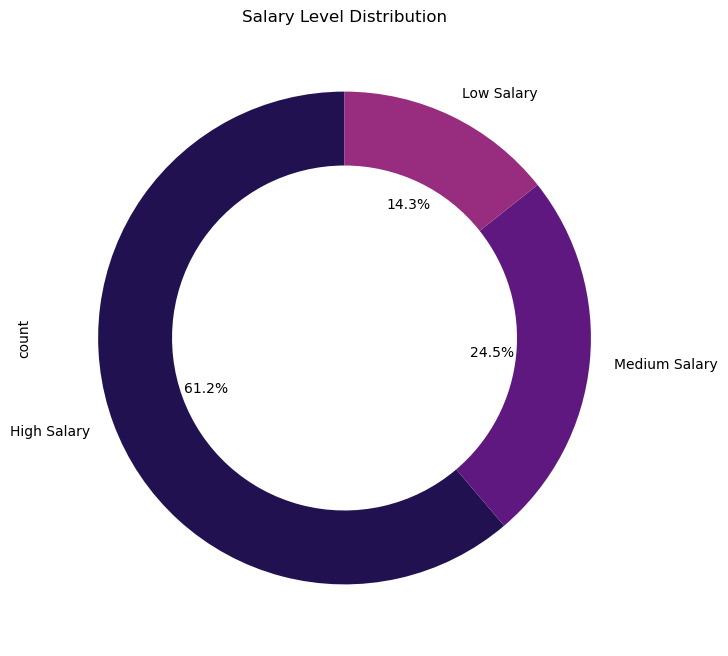

In [28]:
# Cr4eating customer profile distribution by salary level distribution according to my reseacrh, new visualization for my report.
plt.figure(figsize=(8, 8))
combined_df['salary_level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma'),
                                                    wedgeprops=dict(width=0.3))
plt.title('Salary Level Distribution')
plt.show()

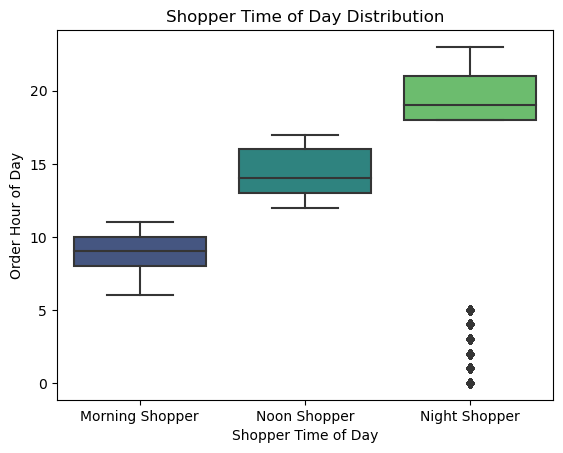

In [29]:
#creating also a new visualization according to my research boxplot. for shopper time of day distribution.
sns.boxplot(x='shopper_time_of_day', y='order_hour_of_day', data=combined_df, palette='viridis')
plt.title('Shopper Time of Day Distribution')
plt.xlabel('Shopper Time of Day')
plt.ylabel('Order Hour of Day')
plt.show()

In [30]:
#Statistical summary to provide more insight on the chart
summary_stats = combined_df.groupby('shopper_time_of_day')['order_hour_of_day'].describe()

In [31]:
print(summary_stats)

                        count       mean       std   min   25%   50%   75%  \
shopper_time_of_day                                                          
Morning Shopper      336797.0   9.331188  1.348196   6.0   8.0   9.0  10.0   
Night Shopper        170505.0  18.159192  5.453947   0.0  18.0  19.0  21.0   
Noon Shopper         432613.0  14.382372  1.655021  12.0  13.0  14.0  16.0   

                      max  
shopper_time_of_day        
Morning Shopper      11.0  
Night Shopper        23.0  
Noon Shopper         17.0  


Morning Shoppers: Most orders are concentrated between 8 AM and 10 AM, with a median around 9 AM.
Night Shoppers: Order hours vary widely, with a median around 19:00 (7 PM).
Noon Shoppers: Orders are centered around midday, with a median around 2 PM.
The boxplot effectively highlights the central tendency and spread of order hours, aiding in the comparison of shopping habits across different times of the day

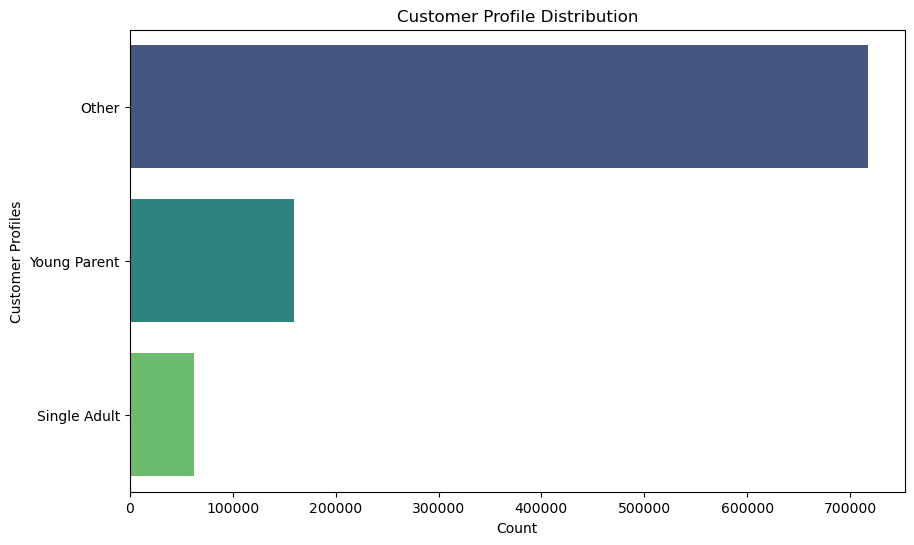

In [32]:
#Creating horizontal bar visualization for single parent, young and other.
customer_profile_count = combined_df['customer_profile'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_profile_count.values, y=customer_profile_count.index, palette='viridis')
plt.title('Customer Profile Distribution')
plt.xlabel('Count')
plt.ylabel('Customer Profiles')
plt.show()

Each bar represents the count of a specific customer profile. Adjust the figure size, color palette, and other parameters as needed.

In [33]:
#7 Grouping by customer profile and aggregating usage frequency and expenditure per request
profile_aggregation = combined_df.groupby('customer_profile').agg({
    'order_frequency_days': ['max', 'mean', 'min'],
    'income': ['max', 'mean', 'min']}).reset_index()

In [34]:
#Renaming the columns for better clarity
profile_aggregation.columns = ['customer_profile', 'max_order_frequency', 'mean_order_frequency', 'min_order_frequency', 'max_income', 'mean_income', 'min_income']

In [35]:
# Displaying the aggregated results
print(profile_aggregation)

  customer_profile  max_order_frequency  mean_order_frequency  \
0            Other                 30.0             10.652989   
1     Single Adult                 30.0             10.822596   
2     Young Parent                 30.0             10.547447   

   min_order_frequency  max_income    mean_income  min_income  
0                  0.0      593901  103024.872165       25941  
1                  0.0      387860   69347.180796       30008  
2                  0.0      396364   75330.194484       50002  


In [36]:
#8.Customer Profiles by Regions: Creating a cross-tabulation of customer profiles by region
region_profile_cross_tab = pd.crosstab(combined_df['Region'], combined_df['customer_profile'], margins=True, margins_name='Total')

# Displaying the cross-tabulation
print(region_profile_cross_tab)

customer_profile   Other  Single Adult  Young Parent   Total
Region                                                      
Midwest           168499         13904         36027  218430
Northeast         125894         11596         28964  166454
South             238652         21784         53246  313682
West              184175         15516         41658  241349
Total             717220         62800        159895  939915


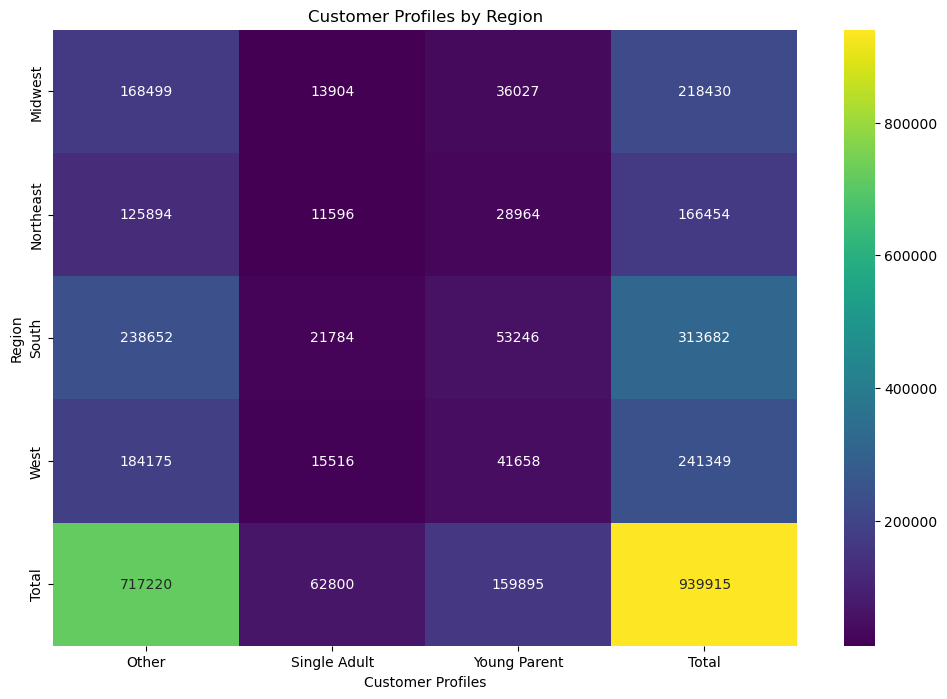

In [37]:
# Creating a heatmap for customer profiles by region
plt.figure(figsize=(12, 8))
sns.heatmap(region_profile_cross_tab, annot=True, cmap='viridis', fmt='g', cbar=True)
plt.title('Customer Profiles by Region')
plt.xlabel('Customer Profiles')
plt.ylabel('Region')
plt.show()

Created a cross-tabulation and a heatmap to visualize the distribution of customer profiles across different regions. This will show how various customer profiles are represented in each region.

In [38]:
#Customer Profiles by Departments:# Creating a cross-tabulation of customer profiles by department
department_profile_cross_tab = pd.crosstab(combined_df['department_id'], combined_df['customer_profile'], margins=True, margins_name='Total')

# Displaying the cross-tabulation
print(department_profile_cross_tab)

customer_profile   Other  Single Adult  Young Parent   Total
department_id                                               
4                 431913         38421        103108  573442
7                  34727          2539          4622   41888
13                 16425          1485          3270   21180
14                  2973           249           295    3517
16                124119         11172         25280  160571
17                   911            53           109    1073
19                 29162          2341          4580   36083
20                 76990          6540         18631  102161
Total             717220         62800        159895  939915


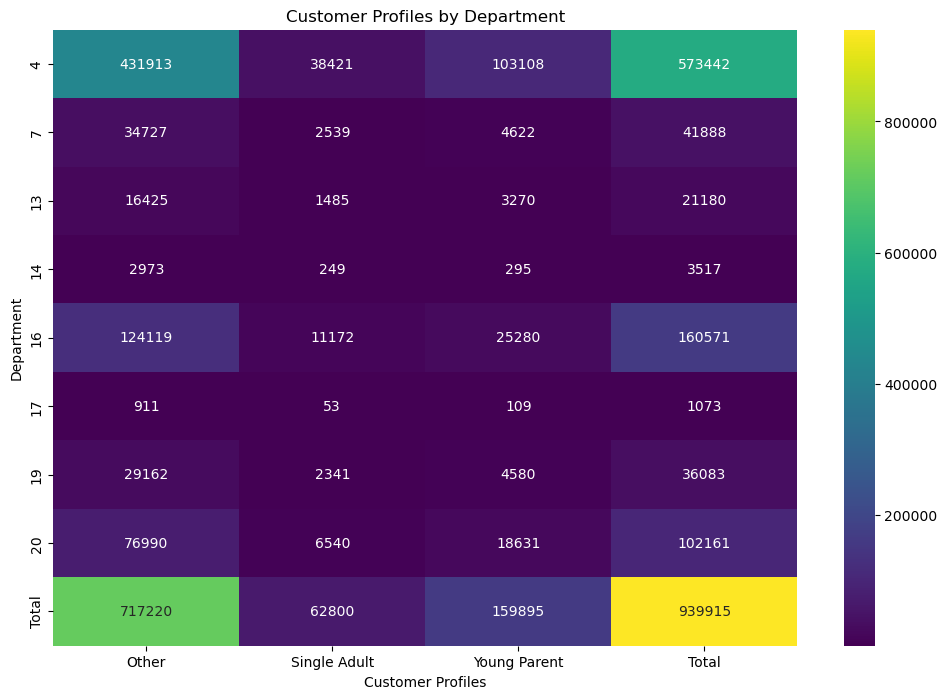

In [39]:
# Creating a heatmap for customer profiles by department
plt.figure(figsize=(12, 8))
sns.heatmap(department_profile_cross_tab, annot=True, cmap='viridis', fmt='g', cbar=True)
plt.title('Customer Profiles by Department')
plt.xlabel('Customer Profiles')
plt.ylabel('Department')
plt.show()

Patterns and links between customer profiles, regions, and departments, gaining insights into how customer behavior varies across different geographical areas and product categories per the request. 

NameError: name 'salary_level' is not defined